In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
import random
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
from PIL import Image
import sys
import torch.optim as optim
import xmltodict
from collections import Counter
import matplotlib.patches as mpatches

In [2]:
print('hey')

hey


In [3]:
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim_copy'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]=="png":
            img_names.append(filename)
        elif os.path.join(dirname, filename)[-3:]=="xml":
            xml_names.append(filename)

In [4]:
path_annotations="/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/annotations/" 
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['with_mask', 'mask_weared_incorrect', 'without_mask']) 
 dict_values([3232, 123, 717])


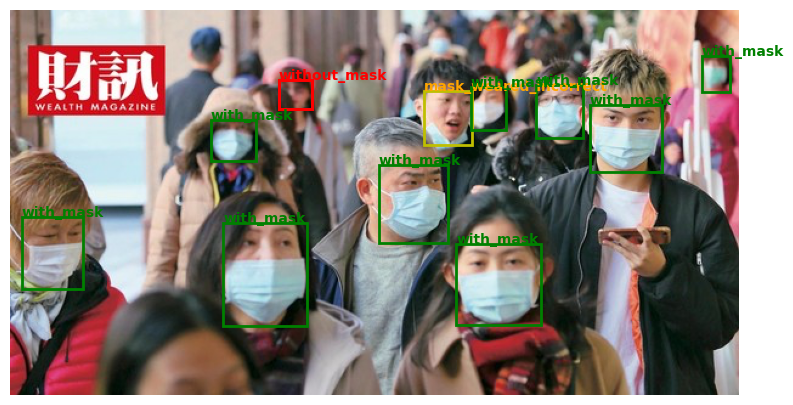

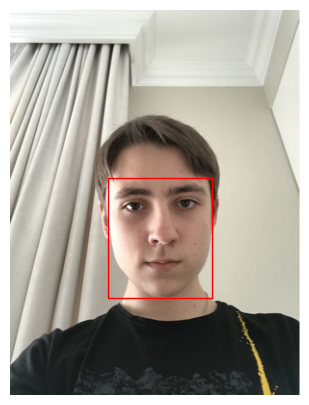

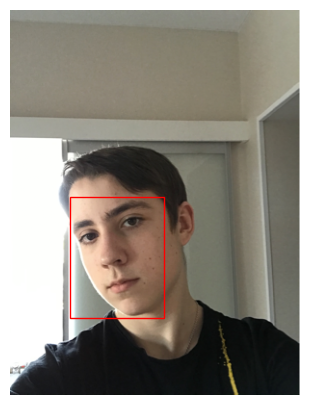

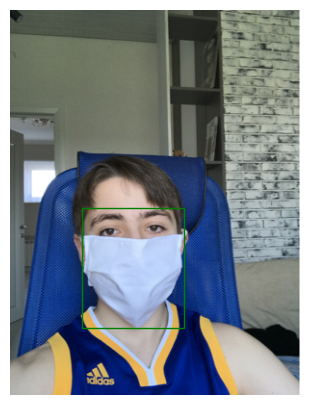

In [5]:
path_image="/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/images_main/"  
def face_cas(img): 
    with open(path_annotations+img[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    image=plt.imread(os.path.join(path_image+img))
    fig,ax=plt.subplots(1)
    ax.axis("off")
    fig.set_size_inches(10,5)
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            ###with_mask
            if temp[i]["name"]=="with_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='g',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("with_mask", (rx, ry), color='green', weight='bold', fontsize=10, ha='left', va='baseline')
            ###without_mask
            if temp[i]["name"]=="without_mask":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))     
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='r',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("without_mask", (rx, ry), color='red', weight='bold', fontsize=10, ha='left', va='baseline')
            ###mask_weared_incorrect
            if temp[i]["name"]=="mask_weared_incorrect":
                x,y,w,h=list(map(int,temp[i]["bndbox"].values()))
                mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor='y',facecolor="none",lw=2,)
                ax.add_patch(mpatch)
                rx, ry = mpatch.get_xy()
                ax.annotate("mask_weared_incorrect", (rx, ry), color='orange', weight='bold', fontsize=10, ha='left', va='baseline')
    else:
        x,y,w,h=list(map(int,temp["bndbox"].values()))
        edgecolor={"with_mask":"g","without_mask":"r","mask_weared_incorrect":"y"}
        mpatch=mpatches.Rectangle((x,y),w-x,h-y,linewidth=1, edgecolor=edgecolor[temp["name"]],facecolor="none",)
    ax.imshow(image)
    ax.add_patch(mpatch)

fun_images = img_names.copy()
random.seed(42)
for i in range(4):
    face_cas(fun_images[i])

In [7]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

In [8]:
def dataset_creation(image_list): 
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(image_list):
        with open(path_annotations+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            label=options[temp["name"]]
            image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"), y,x,h-y,w-x)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                x,y,w,h=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"),y,x,h-y,w-x)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


my_transform=transforms.Compose([transforms.Resize((224,224)),
                                 transforms.ToTensor()])

mydataset=dataset_creation(img_names)

In [10]:
mydataset[1]

[tensor([[[0.4902, 0.4902, 0.4902,  ..., 0.3255, 0.3255, 0.3255],
          [0.4902, 0.4902, 0.4902,  ..., 0.3255, 0.3255, 0.3255],
          [0.4902, 0.4902, 0.4902,  ..., 0.3255, 0.3255, 0.3255],
          ...,
          [0.2667, 0.2667, 0.2667,  ..., 0.2235, 0.2235, 0.2235],
          [0.2667, 0.2667, 0.2667,  ..., 0.2235, 0.2235, 0.2235],
          [0.2667, 0.2667, 0.2667,  ..., 0.2235, 0.2235, 0.2235]],
 
         [[0.3686, 0.3686, 0.3686,  ..., 0.2549, 0.2549, 0.2549],
          [0.3686, 0.3686, 0.3686,  ..., 0.2549, 0.2549, 0.2549],
          [0.3686, 0.3686, 0.3686,  ..., 0.2549, 0.2549, 0.2549],
          ...,
          [0.2235, 0.2235, 0.2235,  ..., 0.1961, 0.1961, 0.1961],
          [0.2235, 0.2235, 0.2235,  ..., 0.1961, 0.1961, 0.1961],
          [0.2235, 0.2235, 0.2235,  ..., 0.1961, 0.1961, 0.1961]],
 
         [[0.2863, 0.2863, 0.2863,  ..., 0.1608, 0.1608, 0.1608],
          [0.2863, 0.2863, 0.2863,  ..., 0.1608, 0.1608, 0.1608],
          [0.2863, 0.2863, 0.2863,  ...,

(400, 267, 4)


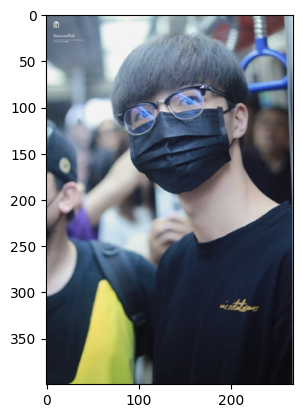

In [11]:
import random

image=plt.imread("/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/images_main/maksssksksss"+str(random.randint(0,854))+".png")


plt.imshow(image)
print(image.shape)

In [12]:
my_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)

In [13]:
image_path_list= "/Users/kush/Desktop/ML002/Mask_dataset/PPE-Detection-uGdxSim/images_main/maksssksksss"+str(random.randint(0,854))+".png"

In [14]:
def plot_transformed_images(image_paths: list, transform, n=3,seed= None):
    """Selects random images from a path
    of images and loads/transforms them,
    them plots the original vs transformed version
    """
    
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig,ax = plt.subplots (nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nSize: {f.size}")
            ax[0].axis(False)
            
            #transform and plot target image
            transformed_image= transform(f).permute(1,2,0) #permute will change order of the dimensions [C,H,W] -> [H,W,C]
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)
            
            fig.suptitle({image_path.parent.stem} , fontsize= 16)

In [15]:
len(mydataset)

4072

In [16]:
type(mydataset)

tuple

In [48]:
X,y= random.choice(mydataset)

In [49]:
X

tensor([[[0.8745, 0.8745, 0.8745,  ..., 0.4667, 0.4667, 0.4667],
         [0.8745, 0.8745, 0.8745,  ..., 0.4667, 0.4667, 0.4667],
         [0.8745, 0.8745, 0.8745,  ..., 0.4667, 0.4667, 0.4667],
         ...,
         [0.6627, 0.6627, 0.6627,  ..., 0.0510, 0.0510, 0.0510],
         [0.6627, 0.6627, 0.6627,  ..., 0.0510, 0.0510, 0.0510],
         [0.6627, 0.6627, 0.6627,  ..., 0.0510, 0.0510, 0.0510]],

        [[0.5882, 0.5882, 0.5882,  ..., 0.3922, 0.3922, 0.3922],
         [0.5882, 0.5882, 0.5882,  ..., 0.3922, 0.3922, 0.3922],
         [0.5882, 0.5882, 0.5882,  ..., 0.3922, 0.3922, 0.3922],
         ...,
         [0.5647, 0.5647, 0.5647,  ..., 0.0000, 0.0000, 0.0000],
         [0.5647, 0.5647, 0.5647,  ..., 0.0000, 0.0000, 0.0000],
         [0.5647, 0.5647, 0.5647,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5216, 0.5216, 0.5216,  ..., 0.3294, 0.3294, 0.3294],
         [0.5216, 0.5216, 0.5216,  ..., 0.3294, 0.3294, 0.3294],
         [0.5216, 0.5216, 0.5216,  ..., 0.3294, 0.3294, 0.

In [50]:
class_names=["with mask","without mask","mask worn incorrectly"]

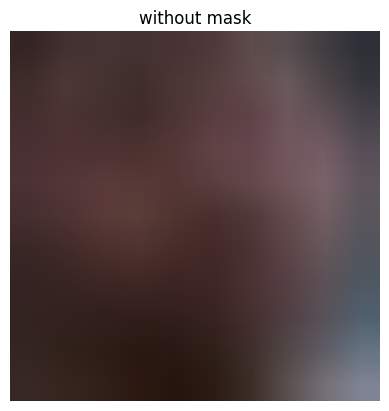

In [51]:
X,y= random.choice(mydataset)
k=X.permute(1, 2, 0)
plt.imshow(k.squeeze())

plt.axis(False)
plt.title(class_names[y])
plt.show()


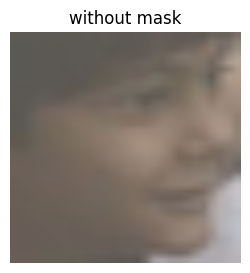

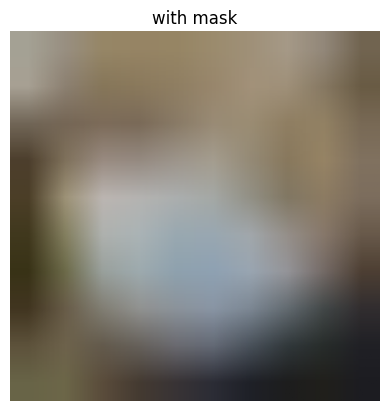

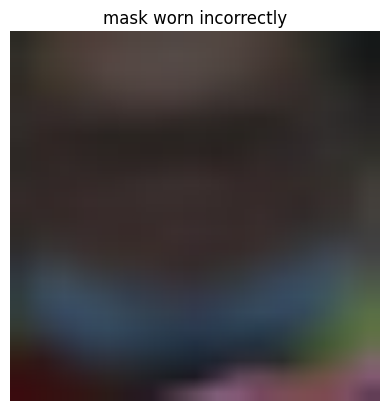

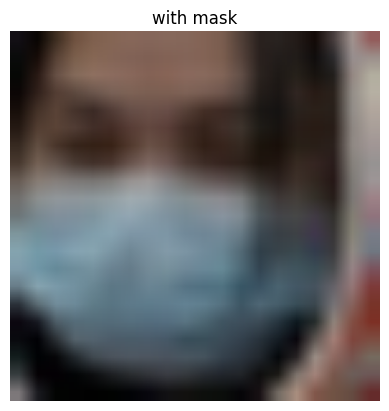

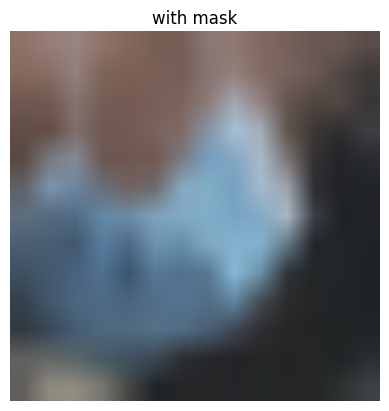

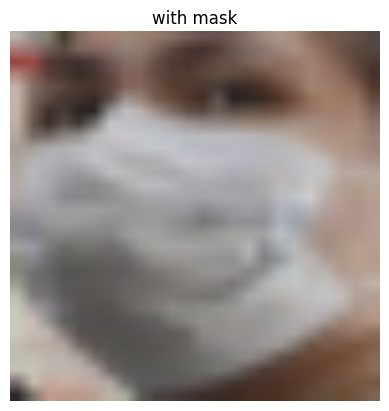

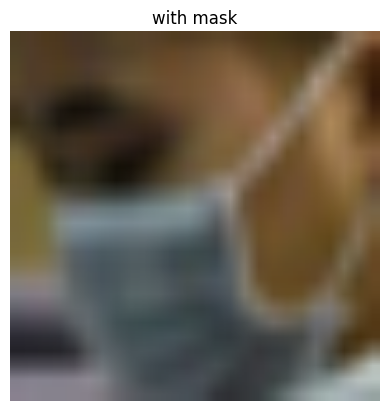

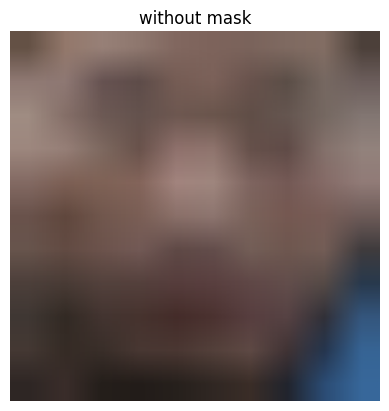

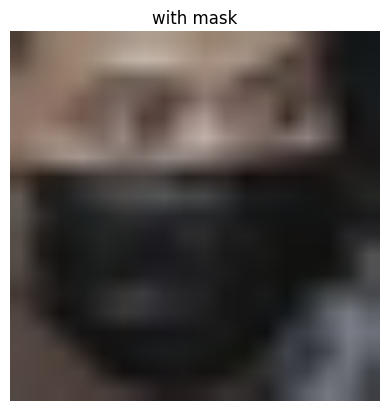

In [22]:
fig=plt.figure(figsize=(3,3))
rows,cols=3,3
for i in range(1, rows*cols+1):
    
 
    rimage,label= random.choice(mydataset)
    k=rimage.permute(1, 2, 0)
    plt.imshow(k.squeeze())
    plt.axis(False)
    plt.title(class_names[label])
    plt.show()



In [23]:
#convert to train/test 

In [52]:
train_size=int((80/100)*len(mydataset))
print(int(train_size))
test_size=int(len(mydataset)-train_size)
print(int(test_size))

3257
815


In [58]:

train_data,test_data=torch.utils.data.random_split(mydataset,[train_size,test_size])


In [59]:
len(train_data)

3257

In [60]:
len(test_data)

815

In [61]:
#dataloaders

In [62]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
#turn datasets into batches
train_dataloader=DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [63]:
len(train_dataloader), len(test_dataloader)

(102, 26)

In [64]:
#whats happening in training datloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape
#batchsize, height,width,color channels


(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [65]:
from torch import nn
#creat a flatten layer
flatten_model=nn.Flatten()
#get a single sample
x= train_features_batch[0]
x.shape
#flatten the sample
output=flatten_model(x) #perform what happened
print('before flattening:')
print(x.shape)#color channels, height, width
print('after flattening:')
print(output.shape)#color channels, height*width

before flattening:
torch.Size([3, 224, 224])
after flattening:
torch.Size([3, 50176])


In [66]:
#training loop

In [67]:
class MNISTModelTinyVGG(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        #block1: conv,relu- conv,relu,maxpool
        #block2: conv,relu- conv,relu,maxpool
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride= 1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56,
                      out_features= output_shape)
        )
    
    #forward method
    
    def forward(self,x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x= self.conv_block_2(x)
        #print(x.shape)
        x= self.classifier(x)
        return x

In [68]:
torch.manual_seed(42)
Mask_det_model= MNISTModelTinyVGG(input_shape=3,
                           hidden_units=10,
                           output_shape= len(class_names))
Mask_det_model

MNISTModelTinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=31360, out_features=3, bias=True)
  )
)

In [69]:
import requests
from pathlib import Path
#download
if Path("helper_functions.py").is_file():
    print('exists, skipping download....')
else:
    print('downloading..')
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

exists, skipping download....


In [74]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=Mask_det_model.parameters(),
                          lr=0.01)

In [75]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float):
    """Prints difference between start and end time """
    total_time= end-start
    return ("train time",total_time)

In [72]:
#training and testing

In [76]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0,0
    #put model in training mode
    model.train()

    #training

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        #1 forward pass
        y_pred= model(X)
        
        loss= loss_fn(y_pred,y)
        
        train_loss += loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch %100==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    #divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #print out whats happening
    print(f"Train loss: {train_loss:0.5f} | Train_acc: {train_acc: 0.2f}%")

test_loss=0
def testing_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            #forward pass
            test_pred= model(X)
            
            #calculate the loss
            test_loss +=loss_fn(test_pred,y)
            
            #calculate the accuracy
            test_acc +=accuracy_fn(y_true=y, 
                                   y_pred=test_pred.argmax(dim=1))
            
        #calculate the test loss average per batch
        test_loss /= len(data_loader)
        
        #calculate the test acc average per batch
        test_acc /= len(data_loader)
    
    #print out whats happening
    print(f"Test_loss: {test_loss:0.5f} | Test_acc: {test_loss: 0.2f}, Test acc: {test_acc: 4f}")


In [78]:
torch.manual_seed(42)
from tqdm.auto import tqdm

from timeit import default_timer as timer
train_time_start_mnist_model = timer()

epochs=5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=Mask_det_model,
               data_loader= train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn)
    
    testing_step(model=Mask_det_model,
               data_loader= test_dataloader,
               loss_fn= loss_fn,
               accuracy_fn= accuracy_fn
              )
train_time_end_mnist_model= timer()
total_train_time_mnist_model= print_train_time(start=train_time_start_mnist_model,
                                           end=train_time_end_mnist_model)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/3257 samples.
Looked at 3200/3257 samples.
Train loss: 0.28578 | Train_acc:  91.50%
Test_loss: 0.22452 | Test_acc:  0.22, Test acc:  93.028846
Epoch: 1
----
Looked at 0/3257 samples.
Looked at 3200/3257 samples.
Train loss: 0.20877 | Train_acc:  93.37%
Test_loss: 0.20890 | Test_acc:  0.21, Test acc:  93.149038
Epoch: 2
----
Looked at 0/3257 samples.
Looked at 3200/3257 samples.
Train loss: 0.25999 | Train_acc:  91.58%
Test_loss: 0.19299 | Test_acc:  0.19, Test acc:  93.870192
Epoch: 3
----
Looked at 0/3257 samples.
Looked at 3200/3257 samples.
Train loss: 0.19252 | Train_acc:  94.05%
Test_loss: 0.18444 | Test_acc:  0.18, Test acc:  94.110577
Epoch: 4
----
Looked at 0/3257 samples.
Looked at 3200/3257 samples.
Train loss: 0.18987 | Train_acc:  93.98%
Test_loss: 0.20068 | Test_acc:  0.20, Test acc:  93.269231


evaluate our model
preditive model
print solutions
try in real time
try to make app